<a href="https://colab.research.google.com/github/hoffera/Filtragem-x-Morfologia/blob/main/Filtragem-x-Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# Filtros espaciais

## Média

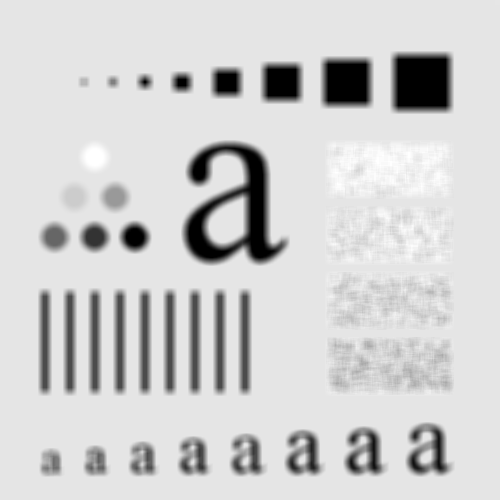

In [ ]:
img = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif')

imgM = cv2.blur(img, (9,9))

cv2_imshow(imgM)

## Mediana

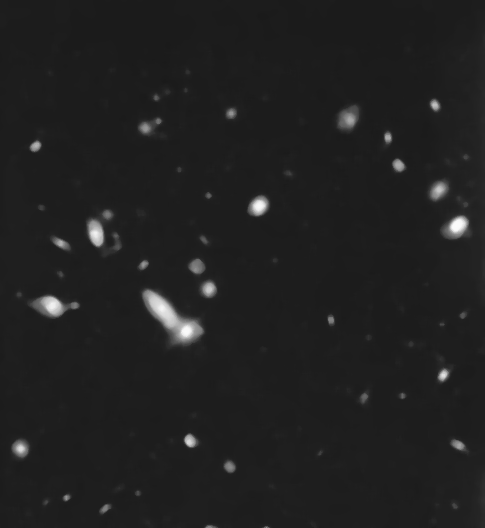

In [ ]:
img = cv2.imread('/content/Fig0334(a)(hubble-original).tif')

imgMed = cv2.medianBlur(img, 9)

cv2_imshow(imgMed)

## Laplaciano - bordas


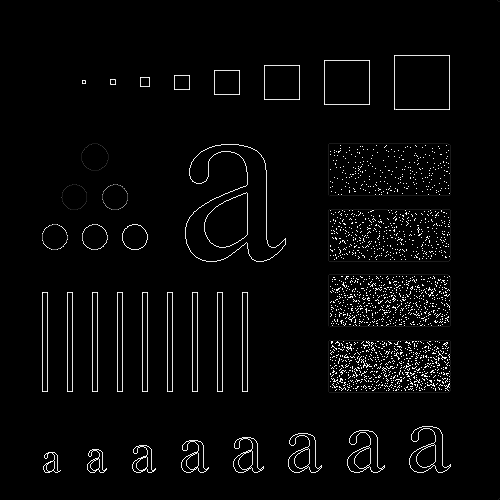

In [ ]:
img = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif')

lap = cv2.Laplacian(img, cv2.CV_8U)


cv2_imshow(lap)

# Filtros frequência

## Passa-baixa

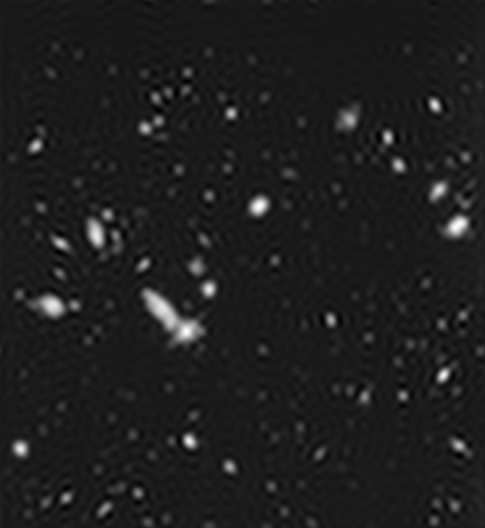

In [ ]:
img = cv2.imread('/content/Fig0334(a)(hubble-original).tif',0)
image_f32 = np.float32(img) # convert from uint8 into float32

dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
ms = np.array(magnitude_spectrum, dtype=np.float32)



#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)

raio = 40

mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 1   # filtragem circular


# apply mask and inverse DFT
fshift = dft_shift*mask  # se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])



img_back = np.array(img_back, dtype=np.float32)




#usar para normalizar a imagem e poder exibir com a imshow() da opencv para deixar entre 0 e 255
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

cv2_imshow(filtered_img)




##  Passa-alta via Transformada de Fourier

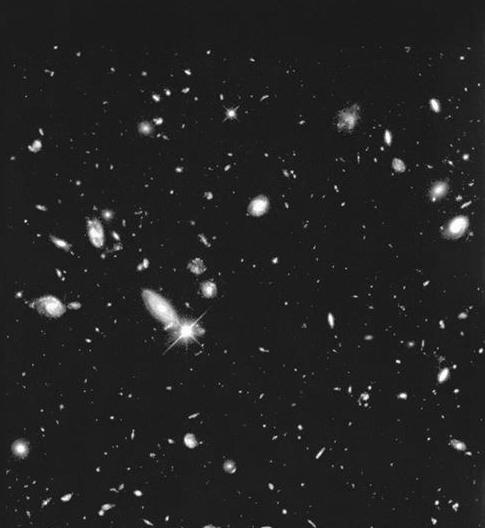

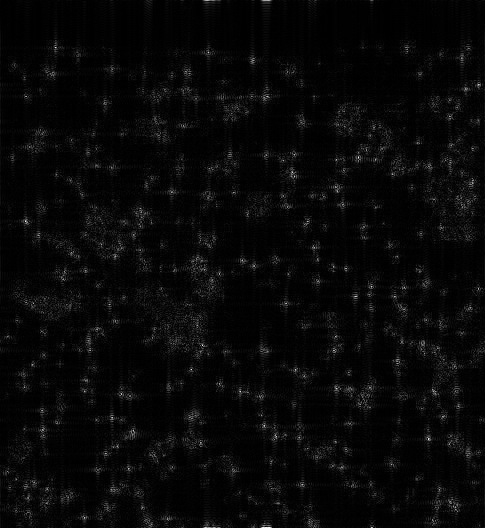

In [ ]:

img = cv2.imread('/content/Fig0334(a)(hubble-original).tif',0)
image_f32 = np.float32(img) # convert from uint8 into float32

dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
ms = np.array(magnitude_spectrum, dtype=np.float32)

#criação da filtro PA
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows,cols,2), np.uint8)
raio = 100
mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 0


# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade)


img_back = np.array(img_back, dtype=np.float32)



#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)


cv2_imshow(img)

cv2_imshow(filtered_img)


# Operações morfológicas

## Dilatação

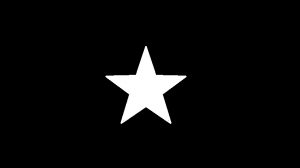

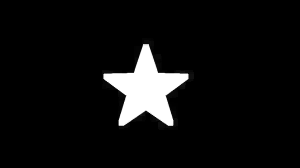

In [ ]:
img = cv2.imread('/content/t3.jpg', 0)

kernel = np.ones((5, 5), np.uint8)



img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2_imshow(img)
cv2_imshow(img_dilation)




## Erosão

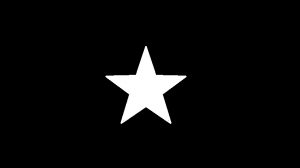

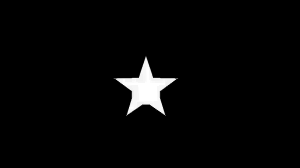

In [ ]:
img = cv2.imread('/content/t3.jpg', 0)

kernel = np.ones((7, 7), np.uint8)



img_erode = cv2.erode(img, kernel, iterations=1)

cv2_imshow(img)
cv2_imshow(img_erode)




## Abertura

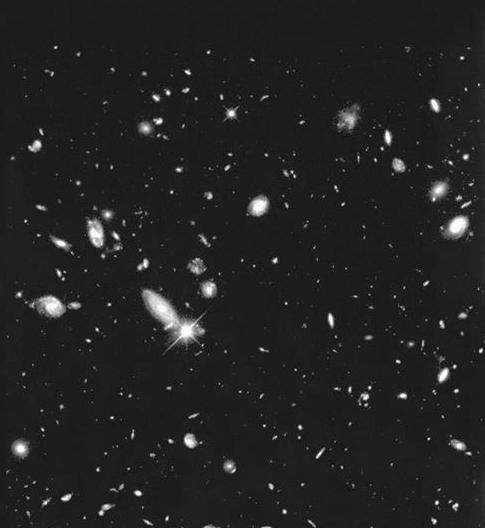

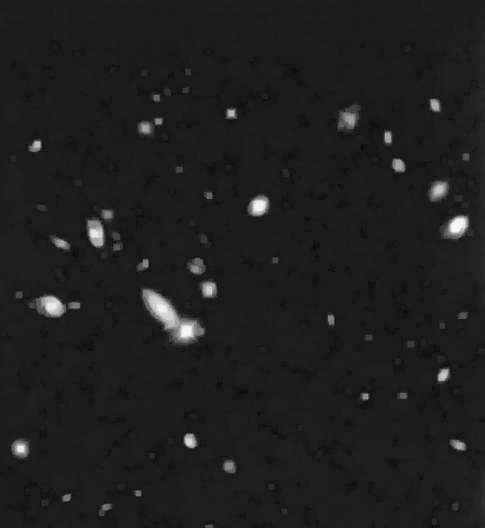

In [ ]:
img = cv2.imread('/content/Fig0334(a)(hubble-original).tif')

kernel = np.ones((5,5),np.uint8)
abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2_imshow(img)
cv2_imshow(abertura)


## Fechamento

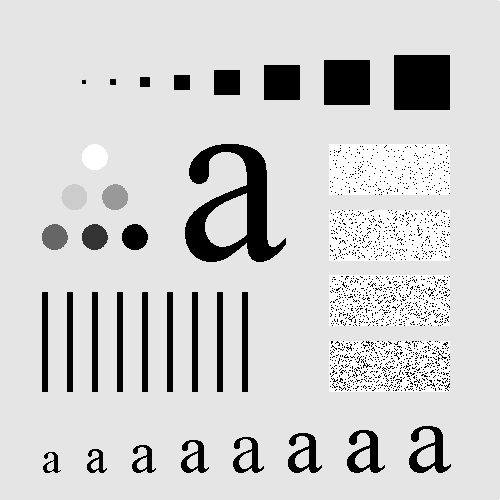

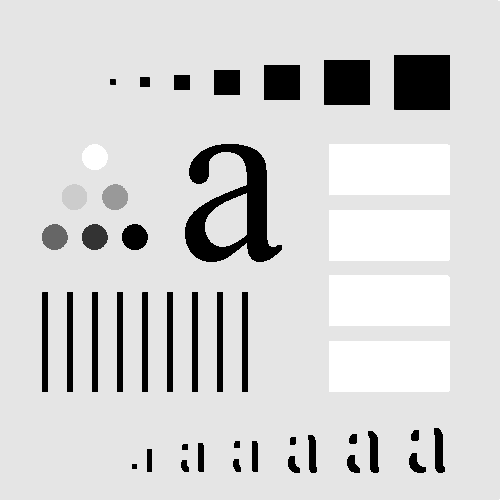

In [ ]:
img = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif')

kernel = np.ones((5,5),np.uint8)
fechamento = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2_imshow(img)
cv2_imshow(fechamento)